In [11]:
from model_selection_utils import *
from model_selection import GridSearchCVList
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.base import clone
from linear_model import WeightedLasso
from sklearn.datasets import fetch_california_housing, load_iris


In [69]:
def reg(models, cv=5):
    return GridSearchCVList(models,
                             param_grid_list=[{}, {}, {}, {}],
                             cv=cv,
                             scoring='neg_mean_squared_error')

In [24]:
X = np.array([0, 1, 2, 3, 4, 5, 6 , 7, 8, 9]).reshape(-1, 1)
Y = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])

print(X.shape, " ", Y.shape)

(10, 1)   (10,)


In [52]:
model = clone(reg().fit(X, Y).best_estimator_)


In [56]:
model.fit(X, Y)

ElasticNetCV()

In [57]:
model.predict(X)

array([ 0.02694611,  2.02095808,  4.01497006,  6.00898204,  8.00299401,
        9.99700599, 11.99101796, 13.98502994, 15.97904192, 17.97305389])

In [59]:
reg().fit(X, Y).predict(X)

array([ 0.02694611,  2.02095808,  4.01497006,  6.00898204,  8.00299401,
        9.99700599, 11.99101796, 13.98502994, 15.97904192, 17.97305389])

In [108]:
# models to compare over (aka every case)
model_list = ['linear', 'forest', 'gbf', 'nnet', 'poly', 'automl']
models = get_complete_estimator_list(model_list, 'continuous')

In [62]:
import time

In [90]:
test_models(X, Y, models, iterations=2)

/Users/coopergibbs/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coopergibbs/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coopergibbs/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coopergibbs/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


([3.8654184355829573e-31,
  0.09130400000000014,
  2.3666426423650404e-33,
  0.005994299535357941,
  2.8398992587956424e-31,
  3.8654184355829573e-31],
 [0.27109503746032715,
  0.6357595920562744,
  0.0931779146194458,
  0.29889988899230957,
  0.15522754192352295,
  1.2663331031799316])

In [96]:
"""
Parameters:
    X:      explanatory variable
    y:      response variable
    models: models to search over
Returns:
    tuple: (mse, time)
            mse: average mse over iterations
            time: average time to fit over iterations

"""
def test_models_helper(X, y, models, iterations=10):
    time_diff = []
    mse = []
    for iters in range(iterations):
        curr_time = time.time()
        m = reg(models)
        m = m.fit(X, y)
        curr_time = time.time() - curr_time
        mse.append(np.square(np.subtract(y, m.predict(X)).mean()))
        time_diff.append(curr_time)

    return np.mean(mse), np.mean(time_diff)






In [89]:
"""
Parameters:
    X:      explanatory variable
    y:      response variable
    models: models to search over
    iterations: number of iterations to average over
    test_all: whether or not to test all the models at once

Returns:
    tuple: (mse array, time array)
            mse: average mse over iterations for every model
            time: average time to fit over iterations for every model
            NOTE: if test_all then last elements of returned arrays is all models mse and time

"""
def test_models(X, y, models, iterations=10, test_all=True):
    time_diff = []
    mse = []
    # test every individual model
    for m in models:
        mse_temp, time_diff_temp = test_models_helper(X, y, [m], iterations)
        mse.append(mse_temp)
        time_diff.append(time_diff_temp)
    # test all
    if test_all:
        mse_temp, time_diff_temp = test_models_helper(X, y, models, iterations)
        mse.append(mse_temp)
        time_diff.append(time_diff_temp)   
    return mse, time_diff


In [13]:
X_cali, y_cali = fetch_california_housing(return_X_y=True)
#print(X_cali.shape, y_cali.shape)
#mse_out, time_out = test_models(X_cali, y_cali, models, iterations=1)

training_data = X_cali

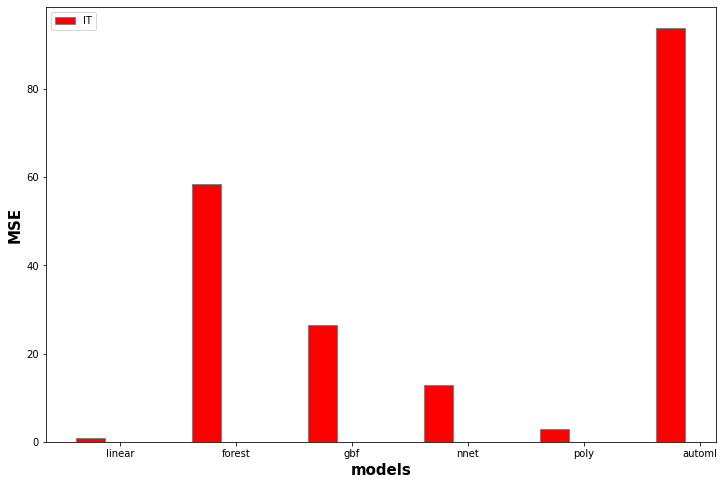

In [110]:

import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
#IT = [12, 30, 1, 8, 22]
#ECE = [28, 6, 16, 5, 10]
#CSE = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
br1 = np.arange(len(mse_out))
br2 = [x + barWidth for x in br1]
#br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, time_out, color ='r', width = barWidth,
        edgecolor ='grey', label ='IT')
#plt.bar(br2, time_out, color ='g', width = barWidth,
        #edgecolor ='grey', label ='ECE')
#plt.bar(br3, CSE, color ='b', width = barWidth,
        #edgecolor ='grey', label ='CSE')
 
# Adding Xticks
plt.xlabel('models', fontweight ='bold', fontsize = 15)
plt.ylabel('MSE', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(mse_out))],
        [*model_list])
 
plt.legend()
plt.show()

In [114]:
# pip install hyperopt
import hyperopt as hp

In [118]:
#X_cali, y_cali
#X_cali[-100:].shape
# train on all except last 100
training_data = X_cali[:-100], y_cali[:-100]
testing_data = X_cali[-100:], y_cali[-100:]

In [ ]:
def objective(hyperparameters):
    """Returns validation score from hyperparameters"""
    
    model = Classifier(hyperparameters)
    validation_loss = cross_validation(model, training_data)    
    return validation_loss


In [3]:
conda install -c conda-forge bayesian-optimization


Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::sphinx==4.2.0=pyhd3eb1b0_1
  - defaults/noarch::numpydoc==1.1.0=pyhd3eb1b0_1
  - defaults/osx-64::anaconda==2021.11=py39_0
  - defaults/osx-64::spyder==5.1.5=py39hecd8cb5_1
| ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install -U colorama==0.4.6

  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
  Attempting uninstall: colorama
    Found existing installation: colorama 0.4.4
    Uninstalling colorama-0.4.4:
      Successfully uninstalled colorama-0.4.4
Note: you may need to restart the kernel to use updated packages.


In [1]:
from bayes_opt import BayesianOptimization

In [15]:
from bayes_opt import BayesianOptimization
from scipy.stats import uniform
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [19]:

# Gradient Boosting Machine
def gbm_cl_bo(max_depth, max_features, learning_rate, n_estimators, subsample):
    params_gbm = {}
    params_gbm['max_depth'] = round(max_depth)
    params_gbm['max_features'] = max_features
    params_gbm['learning_rate'] = learning_rate
    params_gbm['n_estimators'] = round(n_estimators)
    params_gbm['subsample'] = subsample
    scores = cross_val_score(GradientBoostingClassifier(random_state=123, **params_gbm),
                             X_cali, y_cali, scoring='accuracy', cv=5).mean()
    score = scores.mean()
    return score
# Run Bayesian Optimization
#start = time.time()
params_gbm ={
    'max_depth':(3, 10),
    'max_features':(0.8, 1),
    'learning_rate':(0.01, 1),
    'n_estimators':(80, 150),
    'subsample': (0.8, 1)
}
gbm_bo = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=111)
gbm_bo.maximize(init_points=20, n_iter=4)
#print('It takes %s minutes' % ((time.time() - start)/60))


|   iter    |  target   | learni... | max_depth | max_fe... | n_esti... | subsample |
-------------------------------------------------------------------------------------
| 1         | nan       | 0.616     | 4.183     | 0.8872    | 133.8     | 0.8591    |
| 2         | nan       | 0.1577    | 3.157     | 0.884     | 96.71     | 0.8675    |
| 3         | nan       | 0.9908    | 4.664     | 0.8162    | 126.9     | 0.9242    |
| 4         | nan       | 0.2815    | 6.264     | 0.8237    | 85.18     | 0.9802    |
| 5         | nan       | 0.796     | 8.884     | 0.963     | 149.4     | 0.9155    |
| 6         | nan       | 0.8156    | 5.949     | 0.8055    | 111.8     | 0.8211    |
| 7         | nan       | 0.819     | 7.884     | 0.9131    | 99.2      | 0.9997    |
| 8         | nan       | 0.1467    | 7.308     | 0.897     | 108.4     | 0.9456    |
| 9         | nan       | 0.3296    | 5.804     | 0.8638    | 146.3     | 0.9837    |
| 10        | nan       | 0.8157    | 3.239     | 0.98

/Users/coopergibbs/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/coopergibbs/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/coopergibbs/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 423, in fit
    y = self._validate_y(y, sample_weight)
  File "/Users/coopergibbs/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 1103, in _validate_y
    check_classification_targets(y)
  File "/Users/coopergibbs/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: '

| 14        | nan       | 0.4743    | 8.378     | 0.9338    | 110.9     | 0.919     |
| 15        | nan       | 0.467     | 9.743     | 0.8296    | 143.5     | 0.8996    |
| 16        | nan       | 0.5966    | 7.793     | 0.8355    | 140.5     | 0.8964    |
| 17        | nan       | 0.07865   | 5.553     | 0.8723    | 113.0     | 0.8359    |
| 18        | nan       | 0.1835    | 9.644     | 0.9311    | 89.45     | 0.9856    |
| 19        | nan       | 0.8434    | 3.369     | 0.8407    | 141.1     | 0.9348    |
| 20        | nan       | 0.3043    | 8.141     | 0.9237    | 94.73     | 0.9604    |


/Users/coopergibbs/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/coopergibbs/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/coopergibbs/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 423, in fit
    y = self._validate_y(y, sample_weight)
  File "/Users/coopergibbs/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 1103, in _validate_y
    check_classification_targets(y)
  File "/Users/coopergibbs/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: '

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [18]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [20]:
X_train = []
y_train = []

In [21]:
# Linear & regression
def lin_reg(max_depth, max_features, learning_rate, n_estimators, subsample, random_state=123):
    scores = cross_val_score(LinearRegression(random_state=random_state),
                             X_train, y_train, scoring='neg_mean_squared_error', cv=5).mean()
    score = scores.mean()
    return score
# Run Bayesian Optimization
#start = time.time()

gbm_bo = BayesianOptimization(lin_reg, params, random_state=123)
gbm_bo.maximize(init_points=20, n_iter=4)


|   iter    |  target   | learni... | max_depth | max_fe... | n_esti... | subsample |
-------------------------------------------------------------------------------------


TypeError: __init__() got an unexpected keyword argument 'random_state'

In [88]:
X_cali.shape

(20640, 8)

In [90]:
# Random Forest Regression
def random_forest_reg(max_depth, min_samples_split, min_weight_fraction_leaf, max_features, cv=5):
    params = {}
    params['max_depth'] = round(max_depth)
    params['min_samples_split'] = int(min_samples_split)
    params['min_weight_fraction_leaf'] = min_weight_fraction_leaf
    #params['max_features'] = int(max_features)
    scores = cross_val_score(RandomForestRegressor(random_state=123, **params),
                             X_cali, y_cali, scoring='neg_mean_squared_error', cv=cv).mean()
    score = scores.mean()
    return score
# Run Bayesian Optimization
#start = time.time()
params ={
    'max_depth':(3, 10),
    'min_samples_split':(2,5),
    'min_weight_fraction_leaf':(0.0,0.2),
    'max_features':(1, 7)
}
rand_for = BayesianOptimization(random_forest_reg, params, random_state=123)
rand_for.maximize(init_points=10, n_iter=1)

|   iter    |  target   | max_depth | max_fe... | min_sa... | min_we... |
-------------------------------------------------------------------------
| 1         | -0.6999   | 7.875     | 2.717     | 2.681     | 0.1103    |
| 2         | -0.7369   | 8.036     | 3.539     | 4.942     | 0.137     |
| 3         | -0.7462   | 6.367     | 3.353     | 3.03      | 0.1458    |
| 4         | -0.7482   | 6.07      | 1.358     | 3.194     | 0.1476    |
| 5         | -0.6906   | 4.277     | 2.053     | 3.595     | 0.1064    |
| 6         | -0.7205   | 7.441     | 6.097     | 4.173     | 0.1222    |
| 7         | -0.5935   | 8.057     | 2.938     | 3.085     | 0.04565   |
| 8         | -0.6563   | 5.056     | 4.786     | 2.276     | 0.08674   |
| 9         | -0.6141   | 6.016     | 3.962     | 3.277     | 0.06245   |
| 10        | -0.6768   | 5.984     | 6.36      | 4.832     | 0.1004    |
| 11        | -0.6595   | 4.015     | 3.553     | 2.095     | 0.0858    |


In [91]:
rand_for.max['params']

{'max_depth': 8.05710367799155,
 'max_features': 2.937753483119069,
 'min_samples_split': 3.0853659668669424,
 'min_weight_fraction_leaf': 0.04565264617579112}

In [100]:
best_params = rand_for.max['params']
best_params['max_depth'] = None
best_params['max_features'] = 'auto'
best_params['min_samples_split'] = 3
best_params['min_weight_fraction_leaf'] = 0.0
best_params

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0}

In [102]:
np.square(RandomForestRegressor(**best_params).fit(X_cali,y_cali).predict(X_cali) - y_cali).sum()
#RandomForestRegressor(**best_params).fit(X,Y).predict(X) - Y

789.1660682316478

In [94]:
#np.square(RandomForestRegressor().fit(X,Y).predict(X) - Y).sum()
RandomForestRegressor().fit(X_cali,y_cali).get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [87]:
np.square(M.predict(X_cali) - y_cali).sum()

706.6787170898199